## **The Sparks Foundation - GRIP 03/2021**

### **Prediction using Supervised ML**

Predict a percentage of a student based on the no.of study hours


### Author:DIVYA KUNDALA


In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
#from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
# Reading data from a remote link
df = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#count the number of rows and columns of the DataFrame
df.shape

(25, 2)

In [4]:
#Generate discriptive statistics
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#Compute the correlation between two Series
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [6]:
#get the information of the DataFrame including data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
#print the 20th data of the dataframe
df.iloc[19]

Hours      7.4
Scores    69.0
Name: 19, dtype: float64

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

In [8]:
#Display scores more than 75

display=df[(df['Scores']>75)]
print(display)

    Hours  Scores
6     9.2      88
8     8.3      81
10    7.7      85
15    8.9      95
23    6.9      76
24    7.8      86


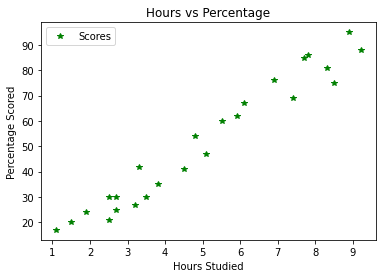

In [9]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='g*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [10]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [11]:
#train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [12]:
#Choose a class and hyperparameters and fit the model to the data
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [13]:
#Measuring Accuracy
print("Training score: ", regressor.score(X_train,y_train))
print("Test score: ", regressor.score(X_test,y_test))

Training score:  0.9515510725211552
Test score:  0.9454906892105356


Slope:  [9.91065648]
Intercept:  2.018160041434683


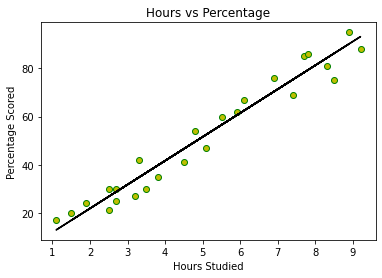

In [14]:
m=regressor.coef_ #estimate coefficient/slope 
print("Slope: ",m)

c=regressor.intercept_ #intercept
print("Intercept: ",c)

# Plotting the regression line
#y=mx+c
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, facecolors='y', edgecolors='g')
plt.plot(X, line, color='k');
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
y_pred #Predicting data scores

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [17]:
y_test #test data scores

array([20, 27, 69, 30, 62], dtype=int64)

In [18]:
print('Accuracy: ', regressor.score(X_test, y_test)*100,"%") #computing the accuracy


Accuracy:  94.54906892105356 %


   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


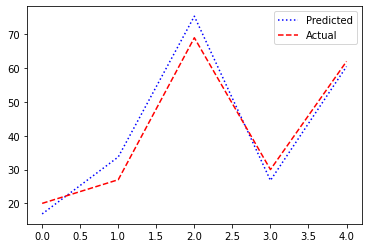

In [19]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df) 
plt.plot(y_pred, color='blue', label = 'Predicted',linestyle='dotted')
plt.plot(y_test, color='red', label = 'Actual', linestyle='dashed')
plt.legend()
plt.show()

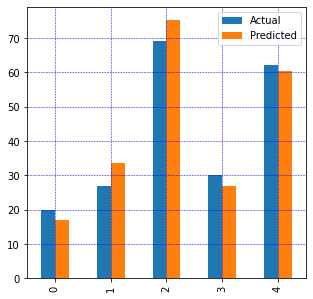

In [20]:
#Bar graph mapping
df.plot(kind='bar', figsize=(5,5))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='blue')
plt.show()

In [21]:
#Input the hours for checking the predicted score
data_q=float(input("Enter hours in float: "))
data_a=regressor.predict([[data_q]])
print("No of Hours = {}".format(data_q))
print("Predicted Score = {}".format(data_a[0]))

Enter hours in float: 9.25
No of Hours = 9.25
Predicted Score = 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. 

In [22]:
print("Mean absolute error: %.3f" % np.mean(np.absolute(y_test - y_pred)))
print("Residual sum of squares (MSE): %.3f" % np.mean((y_test - y_pred) ** 2))
print('Root Mean Square error: %.3f' % np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2-score: %.3f" % r2_score(y_test,y_pred))

Mean absolute error: 4.184
Residual sum of squares (MSE): 21.599
Root Mean Square error: 4.647
R2-score: 0.945


In [ ]:
#According to the definition
R-squared: represents the coefficient of how well the values fit compared to the original values.It ranges from 0 to 1. 1 being the maximum and represents better model.
MSE:     